Dataset source [Fish](https://www.kaggle.com/aungpyaeap/fish-market)

In [34]:
import pandas as pd
data = pd.read_csv("Fish.csv")
#data.head()
data = data[['Weight','Length1','Length2','Length3', 'Height', 'Width']]
data = pd.DataFrame(data)
data.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.00,23.20,25.40,30.00,11.52,4.02
1,290.00,24.00,26.30,31.20,12.48,4.31
2,340.00,23.90,26.50,31.10,12.38,4.70
3,363.00,26.30,29.00,33.50,12.73,4.46
4,430.00,26.50,29.00,34.00,12.44,5.13


In [49]:
import dcor
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Weight'], 
                                                                        data['Width'])))
print("p-value = {:.7f}".format(dcor.independence.distance_covariance_test(data['Weight'], 
                                                                           data['Width'], 
                                                                           exponent=1.0, 
                                                                           num_resamples=2000)[0]))

distance correlation = 0.94
p-value = 0.0004998


In [31]:
def dist_corr(X, Y, pval=True, nruns=2000):
    """ Distance correlation with p-value from bootstrapping
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=nruns)[0]
    if pval:
        return (dc, pv)
    else:
        return dc

In [6]:
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    #print("{:.4f}".format(d), "{:.4f}".format(p))
    if p > 0.1:
        pclr = 'Darkgray'
    else:
        pclr= 'Darkblue'
    ax = pyplot.gca()
    ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = pclr, fontsize = 14)

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


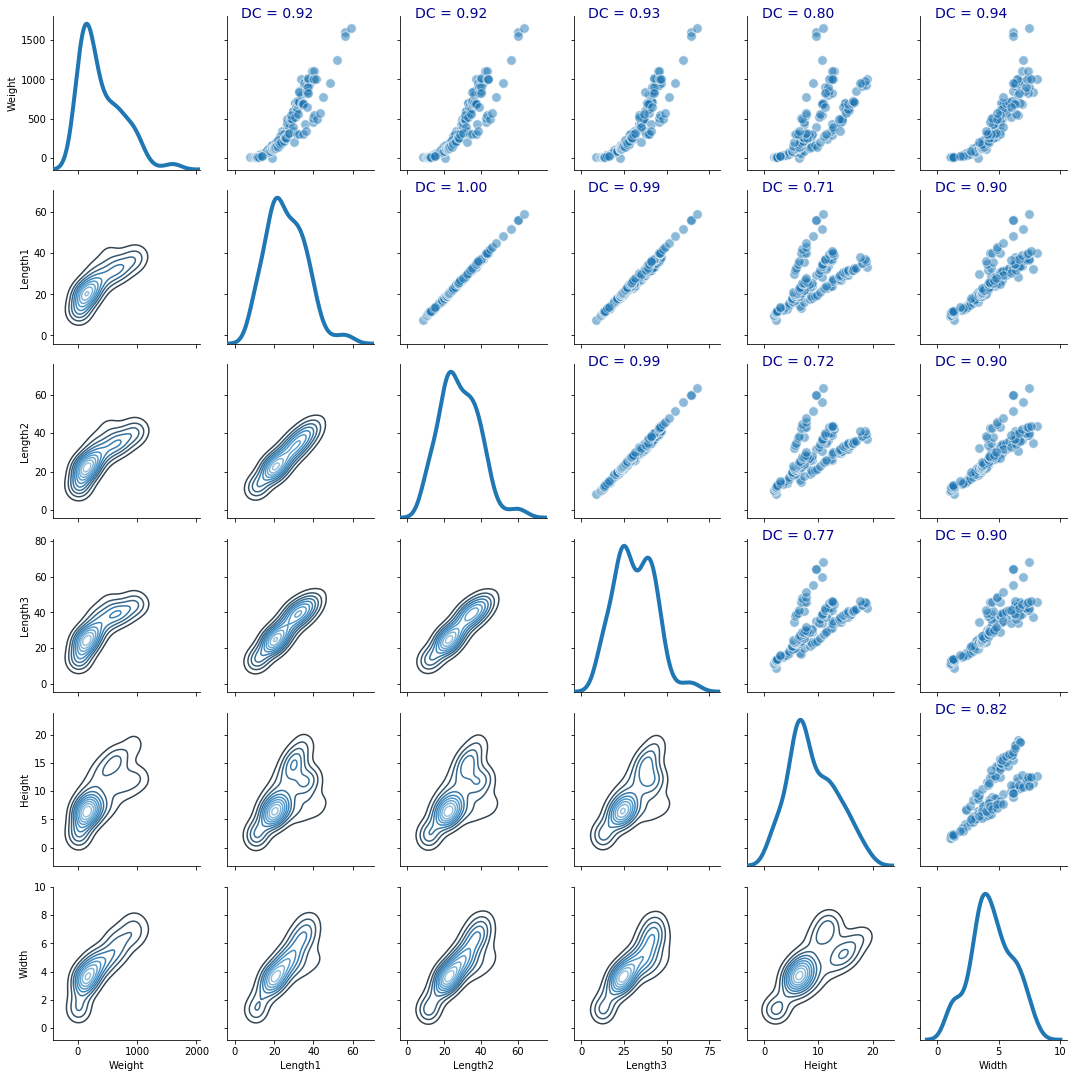

In [32]:
import seaborn as sns
from matplotlib import pyplot
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show();

In [33]:
# Create the distance method using distance_correlation
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 

# Apply the distance method pairwise to every column
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

# check output
pd.options.display.float_format = '{:,.2f}'.format
rslt

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.00,0.92,0.92,0.93,0.80,0.94
Length1,0.92,1.00,1.00,0.99,0.71,0.90
Length2,0.92,1.00,1.00,0.99,0.72,0.90
Length3,0.93,0.99,0.99,1.00,0.77,0.90
Height,0.80,0.71,0.72,0.77,1.00,0.82
Width,0.94,0.90,0.90,0.90,0.82,1.00


In [36]:
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Weight'], data['Length1'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Weight'], data['Length2'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Weight'], data['Length3'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Weight'], data['Height'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Weight'], data['Width'])))
#print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], data['Random_2'])))

distance correlation = 0.92
distance correlation = 0.92
distance correlation = 0.93
distance correlation = 0.80
distance correlation = 0.94


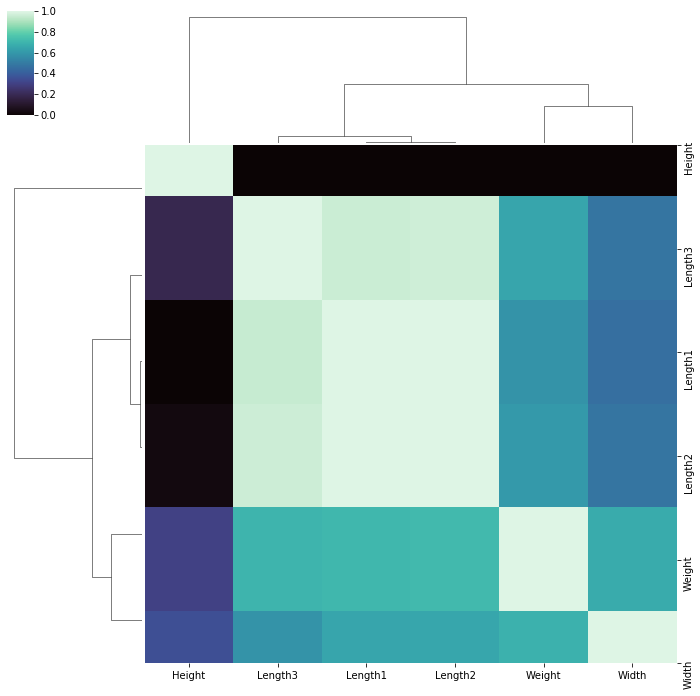

In [44]:
data.rename(index=str, columns={"Gross_pay_transform": "Gross_pay_tr"}, inplace=True)
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2)
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

# h = heatmap.Heatmap(rslt)
# h.plot(vmin=0.0, vmax=1.1, cmap='cubehelix')
# fig = plt.gcf()
# fig.set_size_inches(22, 18)
# plt.gcf().get_axes()[1].invert_xaxis();

# # heatmap
# ax = sns.heatmap(rslt, linewidth=0.5)
# fig = pyplot.gcf()
# fig.set_size_inches(12, 8)
# pyplot.gcf().get_axes()[1].invert_xaxis();
# pyplot.show()

# heatmp + dendrogram
g = sns.clustermap(rslt, cmap="mako",  standard_scale =1)
fig = pyplot.gcf()
fig.set_size_inches(12, 12);

### Correlation matrix ordered by relevant features

With distance correlation, p-value, and plots rearranged by clustering.

In [38]:
a = (g.dendrogram_col.reordered_ind)
a

[4, 3, 1, 2, 0, 5]

In [39]:
b = list(data)
b

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [40]:
data = data[[b[i] for i in a]]
list(data)

['Height', 'Length3', 'Length1', 'Length2', 'Weight', 'Width']

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


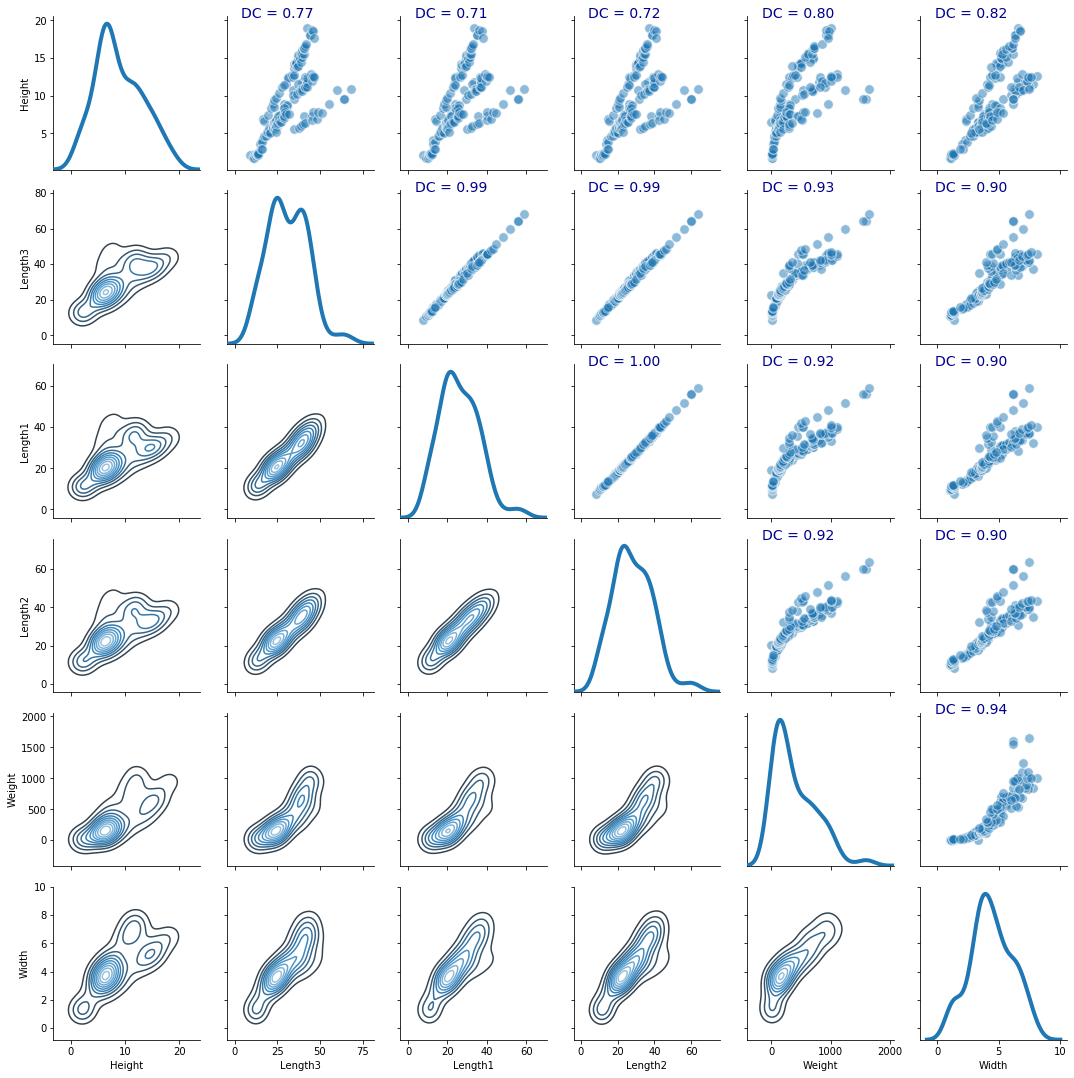

In [41]:
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

In [50]:
import pymc3 as pm
with pm.Model() as glm_model:
    pm.glm.GLM.from_formula('Weight ~ Height + Width + Length1 + Length2 + Length3',
                            data,
                            family=pm.glm.families.Normal())
    trace2 = pm.sample(1000, tune=1000, init='adapt_diag')#, njobs=1)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, Length3, Length2, Length1, Width, Height, Intercept]
Sampling 2 chains: 100%|██████████| 4000/4000 [04:25<00:00, 15.07draws/s]
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c20767940>,
      dtype=object)

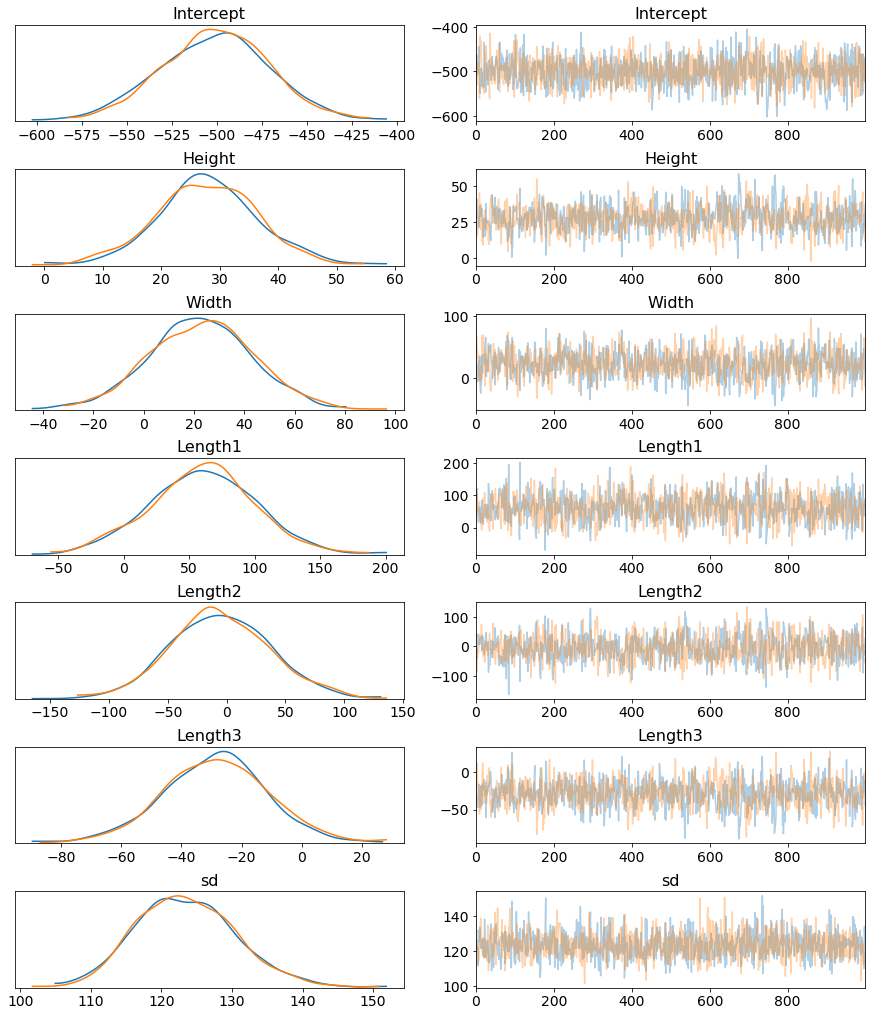

In [51]:
pm.traceplot(trace2)

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c203e3588>,
      dtype=object)

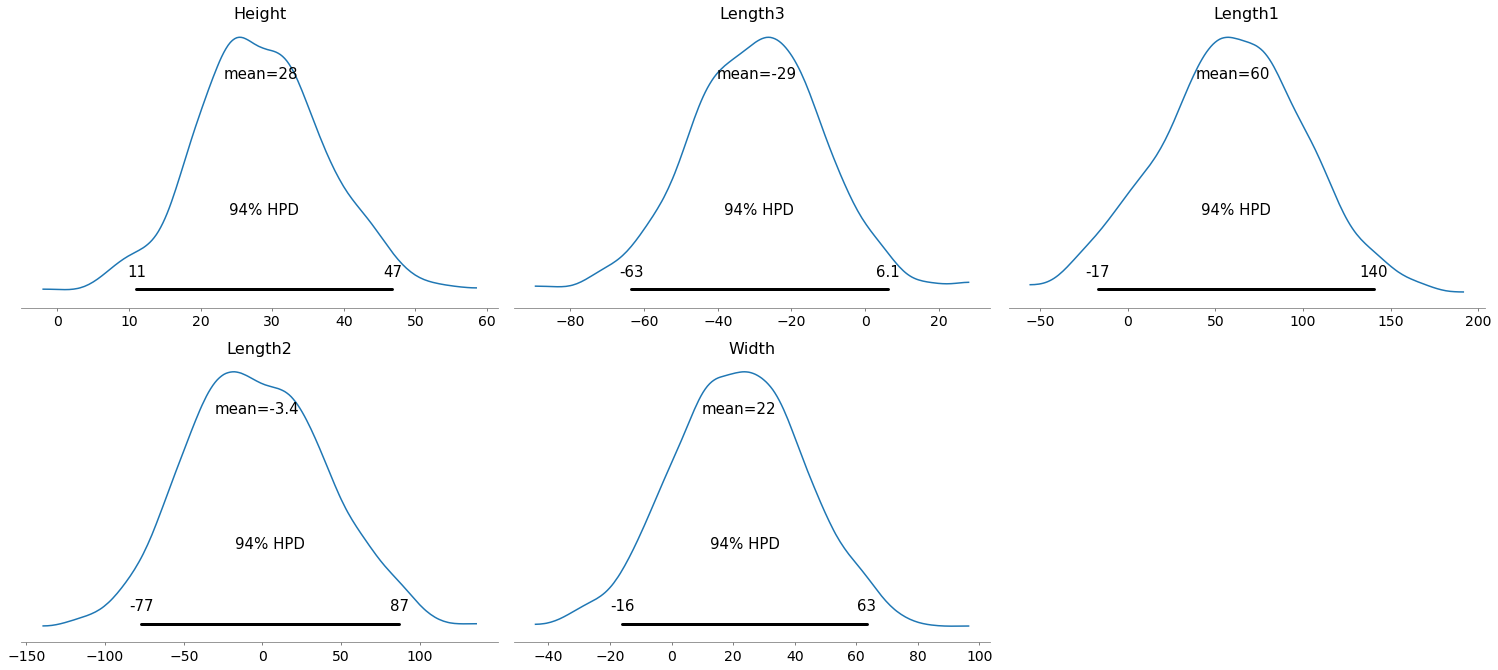

In [52]:
pm.plot_posterior(trace2[500:], varnames=['Height', 'Length3', 'Length1', 'Length2', 'Width'])


In [53]:
import numpy as np
import scipy.stats as st

def confInt(r, nwells):
    z_crit = st.norm.ppf(.975)
    std_Z = 1/np.sqrt(nwells-3)      
    E = z_crit*std_Z
    Z_star = 0.5*(np.log((1+r)/(1.0000000000001-r)))
    ZCI_l = Z_star - E
    ZCI_u = Z_star + E
    RCI_l = (np.exp(2*ZCI_l)-1)/(np.exp(2*ZCI_l)+1) 
    RCI_u = (np.exp(2*ZCI_u)-1)/(np.exp(2*ZCI_u)+1)
    return RCI_u, RCI_l